# 목표
1) 월별 외국인 관광객 통계에 대한 데이터를 수집  
2) 파이썬에서 전처리하기      
3) 전처리한 결과를 시각화  
4) 국적별로 외국인 관광객의 숫자에는 어떤 계정적인 패턴 확인  
5) 외국인 관광객들의 방문이 증가한 혹은 감소한 원인이 되는 이벤트들이 무엇인지 생각해보기  

## 데이터 불러오기

In [1]:
import pandas as pd

### 3-1 엑셀 데이터 불러오기, head() 활용하기

In [2]:
kto_201901 = pd.read_excel('./datasalon-master/3_Tourists_Event/files/kto_201001.xlsx',
                        header=1,
                        usecols='A:G',
                        skipfooter=4)
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계
0,아시아주,329131,18238,421,4339,80916,433045
1,일본,202825,1750,89,549,3971,209184
2,대만,35788,41,17,37,516,36399
3,홍콩,13874,55,0,21,595,14545
4,마카오,554,0,0,0,0,554


### 3-2 tail() 함수 활용하기

In [3]:
kto_201901.tail()

,국적,관광,상용,공용,유학/연수,기타,계
62,아프리카 기타,349,594,25,86,296,1350
63,기타대륙,10,3,0,0,0,13
64,국적미상,10,3,0,0,0,13
65,교포소계,0,0,0,0,22537,22537
66,교포,0,0,0,0,22537,22537


## 데이터 전처리하기

### 3-3 info() 함수활용하기

In [4]:
kto_201901.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   국적      67 non-null     object
 1   관광      67 non-null     int64 
 2   상용      67 non-null     int64 
 3   공용      67 non-null     int64 
 4   유학/연수   67 non-null     int64 
 5   기타      67 non-null     int64 
 6   계       67 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 3.8+ KB


### 3-4 describe() 함수 활용하기

In [5]:
kto_201901.describe()

,관광,상용,공용,유학/연수,기타,계
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,11964.716418,683.462687,81.731343,152.776119,4115.910448,16998.597015
std,47055.349998,2639.234303,370.034666,622.299519,11560.294887,59189.624627
min,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,254.000000,23.500000,0.000000,6.000000,161.500000,605.000000
50%,554.000000,47.000000,2.000000,17.000000,449.000000,1350.000000
75%,3638.000000,301.000000,14.000000,54.500000,1608.000000,7582.000000
max,329131.000000,18238.000000,2159.000000,4339.000000,80916.000000,433045.000000


### 3-5 최소값이 0인 데이터 확인하기(각 컬럼에서 0인 부분 필터링하기)

In [6]:
condition = (kto_201901['관광']==0) | (kto_201901['공용']==0) | (kto_201901['유학/연수']==0)
kto_201901[condition]

,국적,관광,상용,공용,유학/연수,기타,계
3,홍콩,13874,55,0,21,595,14545
4,마카오,554,0,0,0,0,554
6,말레이시아,3292,61,0,49,1157,4559
16,캄보디아,102,22,0,25,131,280
19,이란,69,309,0,3,217,598
20,이스라엘,792,11,0,0,53,856
24,GCC,223,134,0,18,55,430
38,스위스,512,30,0,7,77,626
40,덴마크,378,28,0,5,94,505
41,노르웨이,517,274,0,6,149,946


### 3-6 기준년월 컬럼 생성하기

In [7]:
kto_201901['기준연월'] = '2019-01'
kto_201901.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월
0,아시아주,329131,18238,421,4339,80916,433045,2019-01
1,일본,202825,1750,89,549,3971,209184,2019-01
2,대만,35788,41,17,37,516,36399,2019-01
3,홍콩,13874,55,0,21,595,14545,2019-01
4,마카오,554,0,0,0,0,554,2019-01


### 3-7 unique() 함수 활용하기
#### 칼럼 내 중복을 제거한 값들을 보여주는 함수로써, 원소를 보여주는 함수

In [8]:
kto_201901['국적'].unique()

array(['아시아주', '일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아',
       '싱가포르', '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골',
       '중국', '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미주',
       '미국', '캐나다', '멕시코', '브라질', '미주 기타', '구주', '영국', '독일', '프랑스',
       '네덜란드', '스웨덴', '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인',
       '그리스', '포르투갈', '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아',
       '불가리아', '폴란드', '구주 기타', '대양주', '오스트레일리아', '뉴질랜드', '대양주 기타',
       '아프리카주', '남아프리카공화국', '아프리카 기타', '기타대륙', '국적미상', '교포소계', '교포'],
      dtype=object)

### 3-8 대륙목록 만들기

In [9]:
continents_list = ['아시아주','미주','구주','대양주','아프리카주','기타대륙','교포소계']
continents_list

['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']

### 3-9 대륙목록에 해당하는 값 제외하기(국가명만 남기기)

In [10]:
condition = (kto_201901.국적.isin(continents_list)==False)
kto_201901_country = kto_201901[condition]
kto_201901_country['국적'].unique()

array(['일본', '대만', '홍콩', '마카오', '태국', '말레이시아', '필리핀', '인도네시아', '싱가포르',
       '미얀마', '베트남', '인도', '스리랑카', '파키스탄', '방글라데시', '캄보디아', '몽골', '중국',
       '이란', '이스라엘', '터키', '우즈베키스탄', '카자흐스탄', 'GCC', '아시아 기타', '미국',
       '캐나다', '멕시코', '브라질', '미주 기타', '영국', '독일', '프랑스', '네덜란드', '스웨덴',
       '스위스', '이탈리아', '덴마크', '노르웨이', '벨기에', '오스트리아', '스페인', '그리스', '포르투갈',
       '핀란드', '아일랜드', '우크라이나', '러시아', '크로아티아', '루마니아', '불가리아', '폴란드',
       '구주 기타', '오스트레일리아', '뉴질랜드', '대양주 기타', '남아프리카공화국', '아프리카 기타',
       '국적미상', '교포'], dtype=object)

### 3-10 kto_201901_country 데이터 head() 함수로 확인하기

In [11]:
kto_201901_country.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월
1,일본,202825,1750,89,549,3971,209184,2019-01
2,대만,35788,41,17,37,516,36399,2019-01
3,홍콩,13874,55,0,21,595,14545,2019-01
4,마카오,554,0,0,0,0,554,2019-01
5,태국,13374,39,13,53,4335,17814,2019-01


### 3-11 index 재설정하기(초기화)
#### .reset_index(drop=True)

In [12]:
kto_201901_country_newindex = kto_201901_country.reset_index(drop=True)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월
0,일본,202825,1750,89,549,3971,209184,2019-01
1,대만,35788,41,17,37,516,36399,2019-01
2,홍콩,13874,55,0,21,595,14545,2019-01
3,마카오,554,0,0,0,0,554,2019-01
4,태국,13374,39,13,53,4335,17814,2019-01


### 3-12 대륙 컬럼값 만들기

In [13]:
continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['오세아니아']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']
print(continents)

['아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아시아', '아메리카', '아메리카', '아메리카', '아메리카', '아메리카', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '유럽', '오세아니아', '오세아니아', '오세아니아', '아프리카', '아프리카', '기타대륙', '교포']


### 3-13 대륙컬럼 생성하기

In [14]:
kto_201901_country_newindex['대륙'] = continents
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙
0,일본,202825,1750,89,549,3971,209184,2019-01,아시아
1,대만,35788,41,17,37,516,36399,2019-01,아시아
2,홍콩,13874,55,0,21,595,14545,2019-01,아시아
3,마카오,554,0,0,0,0,554,2019-01,아시아
4,태국,13374,39,13,53,4335,17814,2019-01,아시아


### 3-14 kto_201901_country_newindex 데이터 tail() 확인하기

In [15]:
kto_201901_country_newindex.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙
55,대양주 기타,730,0,4,4,168,906,2019-01,오세아니아
56,남아프리카공화국,214,27,0,2,545,788,2019-01,아프리카
57,아프리카 기타,349,594,25,86,296,1350,2019-01,아프리카
58,국적미상,10,3,0,0,0,13,2019-01,기타대륙
59,교포,0,0,0,0,22537,22537,2019-01,교포


### 3-15 관광객비율(%) 컬럼 생성하기

In [16]:
kto_201901_country_newindex['관광객비율(%)'] = round(kto_201901_country_newindex['관광']/kto_201901_country_newindex['계']*100,1) # 소수점 첫째 자리에서 반올림
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%)
0,일본,202825,1750,89,549,3971,209184,2019-01,아시아,97.0
1,대만,35788,41,17,37,516,36399,2019-01,아시아,98.3
2,홍콩,13874,55,0,21,595,14545,2019-01,아시아,95.4
3,마카오,554,0,0,0,0,554,2019-01,아시아,100.0
4,태국,13374,39,13,53,4335,17814,2019-01,아시아,75.1


### 3-16 관광객비율(%) 컬럼으로 내림차순 정렬하기

In [17]:
kto_201901_country_newindex.sort_values(by='관광객비율(%)', ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%)
3,마카오,554,0,0,0,0,554,2019-01,아시아,100.0
1,대만,35788,41,17,37,516,36399,2019-01,아시아,98.3
0,일본,202825,1750,89,549,3971,209184,2019-01,아시아,97.0
2,홍콩,13874,55,0,21,595,14545,2019-01,아시아,95.4
19,이스라엘,792,11,0,0,53,856,2019-01,아시아,92.5


### 3-17 관광객비율(%) 컬럼으로 오름차순으로 정렬하기

In [18]:
kto_201901_country_newindex.sort_values(by='관광객비율(%)', ascending=True).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%)
59,교포,0,0,0,0,22537,22537,2019-01,교포,0.0
12,스리랑카,39,28,2,13,566,648,2019-01,아시아,6.0
13,파키스탄,70,200,1,41,402,714,2019-01,아시아,9.8
18,이란,69,309,0,3,217,598,2019-01,아시아,11.5
14,방글라데시,86,84,9,42,489,710,2019-01,아시아,12.1


### 3-18 pivot_table() 함수 활용하기
#### 대륙별 관광객 비율의 평균 구하기 

In [19]:
kto_201901_country_newindex.pivot_table(values='관광객비율(%)',
                                       index = '대륙',
                                       aggfunc='mean')

,관광객비율(%)
대륙,
교포,0.000000
기타대륙,76.900000
아메리카,60.760000
아시아,49.544000
아프리카,26.550000
오세아니아,79.733333
유럽,60.926087


### 3-19 중국 국적만 필터링하기

In [20]:
condition = (kto_201901_country_newindex.국적=='중국')
kto_201901_country_newindex[condition]

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%)
17,중국,40425,11930,55,2751,36091,91252,2019-01,아시아,44.3


### 3-20 2019년 1월 우리나라 방문하는 전체 외국인 관광객 숫자 구하기

In [21]:
tourist_sum = sum(kto_201901_country_newindex['관광'])
tourist_sum

400818

### 3-21 전체비율(%) 컬럼 생성하기
#### 국가별 관광 전체비율 구하기

In [22]:
kto_201901_country_newindex['전체비율(%)'] = round(kto_201901_country_newindex['관광']/tourist_sum*100,1)
kto_201901_country_newindex.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2019-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2019-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2019-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2019-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2019-01,아시아,75.1,3.3


### 3-22 전체비율(%) 컬럼 기준으로 내림차순 정렬하기

In [23]:
kto_201901_country_newindex.sort_values('전체비율(%)', ascending=False).head()

,국적,관광,상용,공용,유학/연수,기타,계,기준연월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2019-01,아시아,97.0,50.6
17,중국,40425,11930,55,2751,36091,91252,2019-01,아시아,44.3,10.1
1,대만,35788,41,17,37,516,36399,2019-01,아시아,98.3,8.9
25,미국,26943,1195,2145,135,12647,43065,2019-01,아메리카,62.6,6.7
2,홍콩,13874,55,0,21,595,14545,2019-01,아시아,95.4,3.5


### 3-23 데이터 전처리 과정 함수로 만들기

In [36]:
def create_kto_data(yy,mm):
    file_path = './datasalon-master/3_Tourists_Event/files/kto_{}{}.xlsx'.format(yy,mm)
    
    df = pd.read_excel(file_path, header=1, skipfooter=4, usecols='A:G')
    
    # 3. "기준년월" 컬럼 추가하기 
    df['기준년월'] = '{}-{}'.format(yy, mm) 
    
    # 4. "국적" 컬럼에서 대륙 제거하고 국가만 남기기 
    ignore_list = ['아시아주', '미주', '구주', '대양주', '아프리카주', '기타대륙', '교포소계']    # 제거할 대륙명 선정하기 
    condition = (df['국적'].isin(ignore_list) == False)    # 대륙 미포함 조건 
    df_country = df[condition].reset_index(drop=True) 
    
    # 5. "대륙" 컬럼 추가하기 
    continents = ['아시아']*25 + ['아메리카']*5 + ['유럽']*23 + ['대양주']*3 + ['아프리카']*2 + ['기타대륙'] + ['교포']    # 대륙 컬럼 생성을 위한 목록 만들어 놓기 
    df_country['대륙'] = continents   
                       
    # 6. 국가별 "관광객비율(%)" 컬럼 추가하기 
    df_country['관광객비율(%)'] = round(df_country.관광 / df_country.계 * 100, 1) 
                       
    # 7. "전체비율(%)" 컬럼 추가하기 
    tourist_sum = sum(df_country['관광'])
    df_country['전체비율(%)'] = round(df_country['관광'] / tourist_sum * 100, 1)
    
    # 8. 결과 출력하기 
    return(df_country)

### 3-24  create_kto_data() 함수를 활용해서 2018년 12월 데이터 불러오기

In [25]:
kto_test = create_kto_data(2018,12)
kto_test.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,252461,1698,161,608,3593,258521,2018-12,아시아,97.7,22.7
1,대만,85697,71,22,266,1252,87308,2018-12,아시아,98.2,7.7
2,홍콩,58355,41,3,208,939,59546,2018-12,아시아,98.0,5.2
3,마카오,6766,0,1,20,36,6823,2018-12,아시아,99.2,0.6
4,태국,47242,42,302,58,6382,54026,2018-12,아시아,87.4,4.2


## 반복문(for문)을 통해 다수의 엑셀데이터 불러와서 합치기

### 3-25 이중 반복문으로 기준년월 출력하기

In [26]:
for yy in range(2010,2020):
    for mm in range(1,13):
        yymm = '{}{}'.format(yy,mm)
        print(yymm)

20101
20102
20103
20104
20105
20106
20107
20108
20109
201010
201011
201012
20111
20112
20113
20114
20115
20116
20117
20118
20119
201110
201111
201112
20121
20122
20123
20124
20125
20126
20127
20128
20129
201210
201211
201212
20131
20132
20133
20134
20135
20136
20137
20138
20139
201310
201311
201312
20141
20142
20143
20144
20145
20146
20147
20148
20149
201410
201411
201412
20151
20152
20153
20154
20155
20156
20157
20158
20159
201510
201511
201512
20161
20162
20163
20164
20165
20166
20167
20168
20169
201610
201611
201612
20171
20172
20173
20174
20175
20176
20177
20178
20179
201710
201711
201712
20181
20182
20183
20184
20185
20186
20187
20188
20189
201810
201811
201812
20191
20192
20193
20194
20195
20196
20197
20198
20199
201910
201911
201912


### 3-26 숫자 1출력하기

In [27]:
mm =1
print(mm)

1


### 3-27 zfill()함수 이용하기 1(0을 포함한 두자리로 출력하기)

In [28]:
print(str(mm).zfill(2))

01


### 3-28 zfill()함수 이용하기 1(0을포함한 3자리, 4자리로 출력하기)

In [29]:
print(str(mm).zfill(3))
print(str(mm).zfill(4))

001
0001


### 3-29 6자리로 정렬하여 기준년월 출력하기

In [30]:
for yy in range(2010,2020):
    for mm in range(1,13):
        mm_str = str(mm).zfill(2)
        yymm = '{}{}'.format(yy, mm_str)
        print(yymm)

201001
201002
201003
201004
201005
201006
201007
201008
201009
201010
201011
201012
201101
201102
201103
201104
201105
201106
201107
201108
201109
201110
201111
201112
201201
201202
201203
201204
201205
201206
201207
201208
201209
201210
201211
201212
201301
201302
201303
201304
201305
201306
201307
201308
201309
201310
201311
201312
201401
201402
201403
201404
201405
201406
201407
201408
201409
201410
201411
201412
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201701
201702
201703
201704
201705
201706
201707
201708
201709
201710
201711
201712
201801
201802
201803
201804
201805
201806
201807
201808
201809
201810
201811
201812
201901
201902
201903
201904
201905
201906
201907
201908
201909
201910
201911
201912


### 3-30 데이터를 담을 빈 데이터프레임 만들기

In [31]:
df = pd.DataFrame()

### 3-31 패턴 분석결과를 이중 반복문을 통해 구현

In [39]:
for yy in range(2010, 2020):
    for mm in range(1, 13):
        temp = create_kto_data(str(yy), str(mm).zfill(2))
        df = df.append(temp, ignore_index=True)

### 3-32 head() 함수로 확인하기

In [40]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


### 3-33 tail() 함수로 확인하기

In [41]:
df.tail()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
42235,대양주 기타,154,2,4,0,92,252,2019-12,대양주,61.1,0.0
42236,남아프리카공화국,665,3,0,3,251,922,2019-12,아프리카,72.1,0.1
42237,아프리카 기타,1273,644,66,93,1002,3078,2019-12,아프리카,41.4,0.1
42238,국적미상,36,1,0,0,10,47,2019-12,기타대륙,76.6,0.0
42239,교포,0,0,0,0,5281,5281,2019-12,교포,0.0,0.0


### 3-34 통합 데이터 생성하기

In [42]:
df = pd.DataFrame()

for yy in range(2010,2020):
    for mm in range(1,13):
        try:
            temp = create_kto_data(str(yy), str(mm).zfill(2))
            df = df.append(temp, ignore_index= True)
        except:
            pass

### 3-35 df 데이터 info() 함수로 확인하기

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7200 entries, 0 to 7199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   국적        7200 non-null   object 
 1   관광        7200 non-null   int64  
 2   상용        7200 non-null   int64  
 3   공용        7200 non-null   int64  
 4   유학/연수     7200 non-null   int64  
 5   기타        7200 non-null   int64  
 6   계         7200 non-null   int64  
 7   기준년월      7200 non-null   object 
 8   대륙        7200 non-null   object 
 9   관광객비율(%)  7200 non-null   float64
 10  전체비율(%)   7200 non-null   float64
dtypes: float64(2), int64(6), object(3)
memory usage: 618.9+ KB


### 3-36 df 데이터 엑셀로 저장하기

In [44]:
df.to_excel('./kko_total.xlsx', index=False)

## 데이터 시각화 하기

### 3-37 kto_total.xlsx 파일 df 로 불러오기

In [45]:
import pandas as pd

In [46]:
df = pd.read_excel('./kko_total.xlsx')
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


### 3-38 그래프에서 한글 표기를 위한 글자체 변경

In [49]:
from matplotlib import font_manager, rc
import platform

In [51]:
if platform.system() == 'Windows': 
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else: 
    print('Check your OS system')

### 3-39 matplotlib 라이브러리 불러오기

In [52]:
import matplotlib.pyplot as plt

### 3-40 중국 국적 데이터 필터링하기

In [53]:
condition = (df['국적']=='중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0


### 3-41 시계열 그래프 그리기1

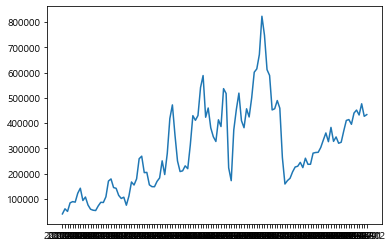

In [54]:
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.show()

### 3-42 시계열 그래프 그리기 2(꾸미기)

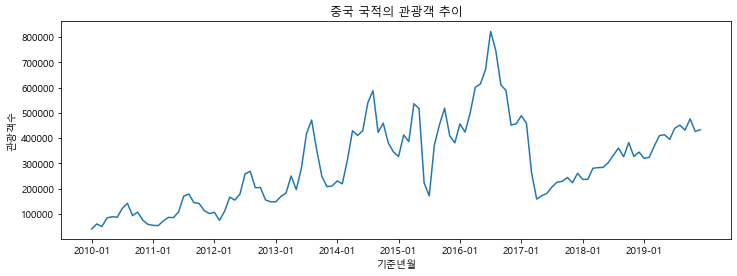

In [56]:
plt.figure(figsize=(12,4))
plt.plot(df_filter['기준년월'], df_filter['관광'])
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')

plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])
plt.show()

### 3-43 우리나라 방문하는 외국인 관광객 top5 리스트 만들기

In [57]:
cntry_list = ['중국','일본','대만','미국','홍콩']

### 3-44 반복문으로 여러 그래프 그리기

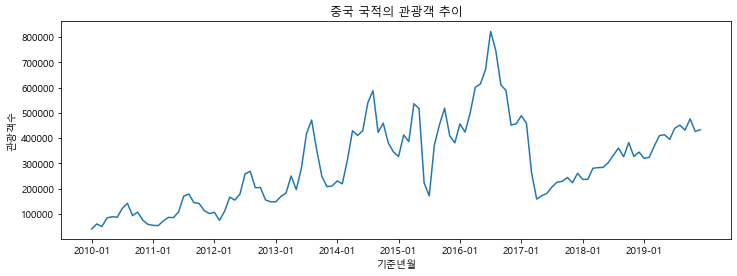

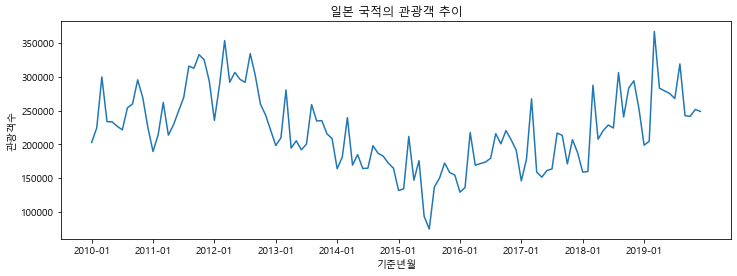

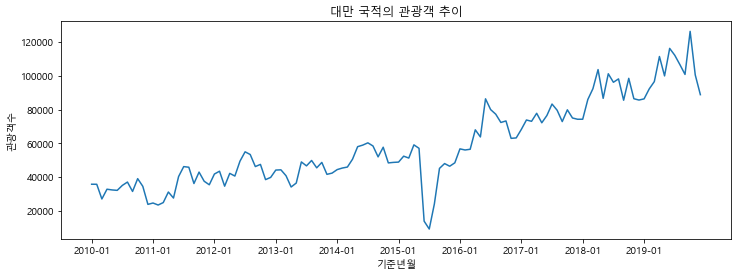

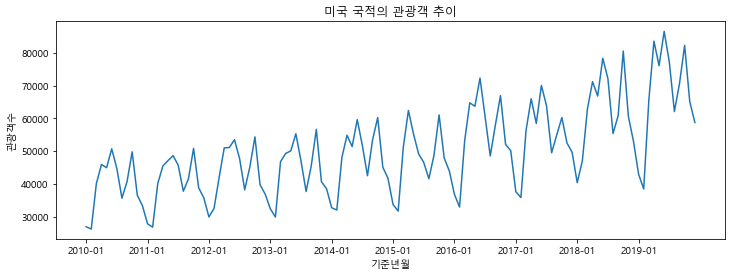

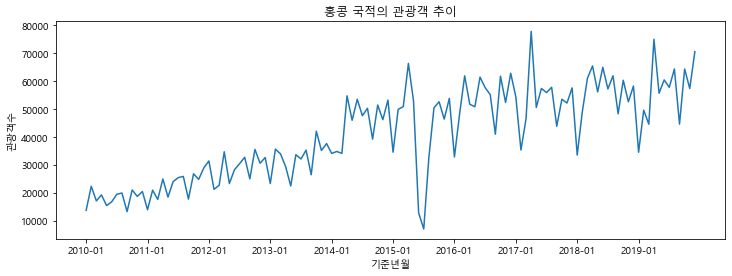

In [58]:
for cntry in cntry_list:
    condition = (df['국적']==cntry)
    df_filter = df[condition]
    
    plt.figure(figsize=(12,4))
    
    plt.plot(df_filter['기준년월'], df_filter['관광'])
    
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    
    plt.xticks(['2010-01','2011-01','2012-01','2013-01','2014-01','2015-01','2016-01','2017-01','2018-01','2019-01'])
    
    plt.show()

### 3-45 df데이터 head() 함수로 살펴보기

In [59]:
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%)
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3


### 3-46 str.slice() 함수를 이용해 년도, 월 컬럼 만들기

In [60]:
df['년도'] = df['기준년월'].str.slice(0,4)
df['월'] = df['기준년월'].str.slice(5,7)
df.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
0,일본,202825,1750,89,549,3971,209184,2010-01,아시아,97.0,50.6,2010,01
1,대만,35788,41,17,37,516,36399,2010-01,아시아,98.3,8.9,2010,01
2,홍콩,13874,55,0,21,595,14545,2010-01,아시아,95.4,3.5,2010,01
3,마카오,554,0,0,0,0,554,2010-01,아시아,100.0,0.1,2010,01
4,태국,13374,39,13,53,4335,17814,2010-01,아시아,75.1,3.3,2010,01


### 3-47 중국인 관광객 필터링하기

In [61]:
condition = (df['국적']=='중국')
df_filter = df[condition]
df_filter.head()

,국적,관광,상용,공용,유학/연수,기타,계,기준년월,대륙,관광객비율(%),전체비율(%),년도,월
17,중국,40425,11930,55,2751,36091,91252,2010-01,아시아,44.3,10.1,2010,01
77,중국,60590,7907,68,29546,42460,140571,2010-02,아시아,43.1,13.6,2010,02
137,중국,50330,13549,174,14924,62480,141457,2010-03,아시아,35.6,9.2,2010,03
197,중국,84252,13306,212,2199,47711,147680,2010-04,아시아,57.1,15.5,2010,04
257,중국,89056,12325,360,2931,49394,154066,2010-05,아시아,57.8,17.0,2010,05


### 3-48 pivot_tabble() 함수 이용하기
#### 년도별 월 관광객 수 확인하기

In [62]:
df_pivot = df_filter.pivot_table(values='관광',
                                index = '년도',
                                columns = '월')

df_pivot

월,01,02,03,04,05,06,07,08,09,10,11,12
년도,,,,,,,,,,,,
2010,40425,60590,50330,84252,89056,87080,122432,142180,93545,107237,75686,58987
2011,55070,53863,72003,86397,85668,108060,170524,178937,144704,141824,113856,101605
2012,106606,74895,110965,166843,154841,179074,258907,268988,203857,204866,155503,148320
2013,148118,169395,182850,250549,196306,280319,417991,472005,353359,249850,208175,210950
2014,230706,219533,313400,429419,410971,429991,540683,588181,423133,459708,381118,345957
2015,327225,413096,386386,536428,517154,223101,172075,372990,453670,518651,409635,381722
2016,456636,424232,500018,601460,614636,671493,823016,747818,611538,588561,452082,456882
2017,489256,458952,263788,158784,172527,181507,207099,226153,229172,244541,223743,260983
2018,236825,237075,281020,283533,284317,303405,332657,360982,326438,382922,327664,345135


### 3-49 히트맵 그래프 그리기에 필요한 라이브러리 import

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

### 3-50 히트맵 그래프 그리기
#### 관광객 수가 많을 수록 색상이 진하게 표시되기 때문에 어느시기에 관광객 수가 많은지, 적은지 한눈에 알 수 있음 

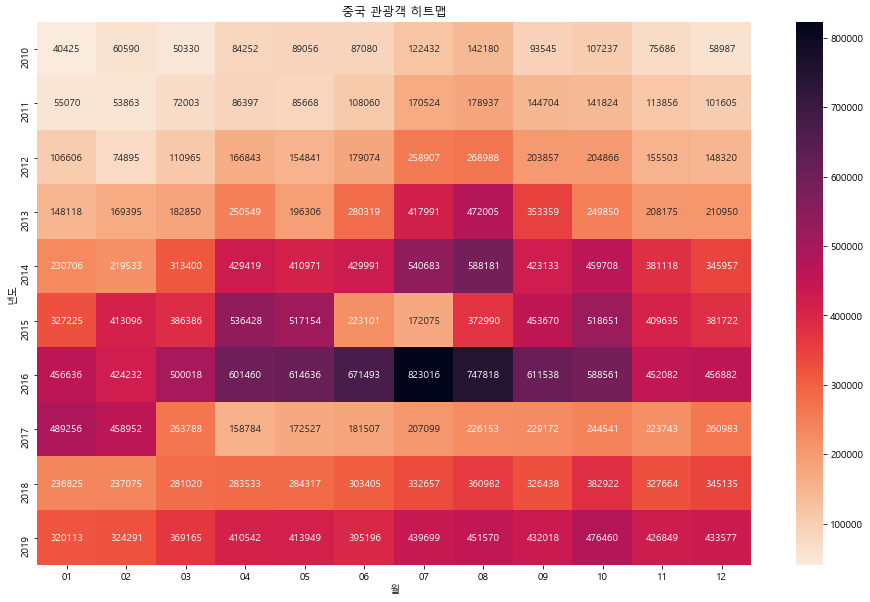

In [75]:
plt.figure(figsize = (16,10))
sns.heatmap(df_pivot,
            annot = True, # annot = True -> 실제 값 표시 여부,
            fmt = '.0f', # fmt = '.0f' -> 숫자 형태를 소수점이 없는 실수 형태로 표시
            cmap = 'rocket_r') #cmap = 'rocket_r' -> 그래프의 색깔 조합

plt.title('중국 관광객 히트맵')
plt.show()

### 3-51 반복문으로 top5 국가 히트맵 그래프 그리기

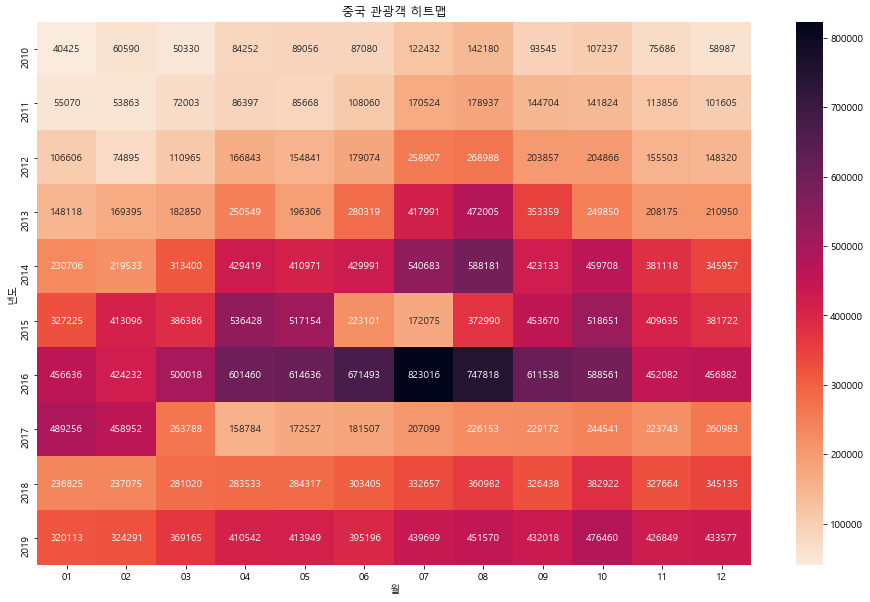

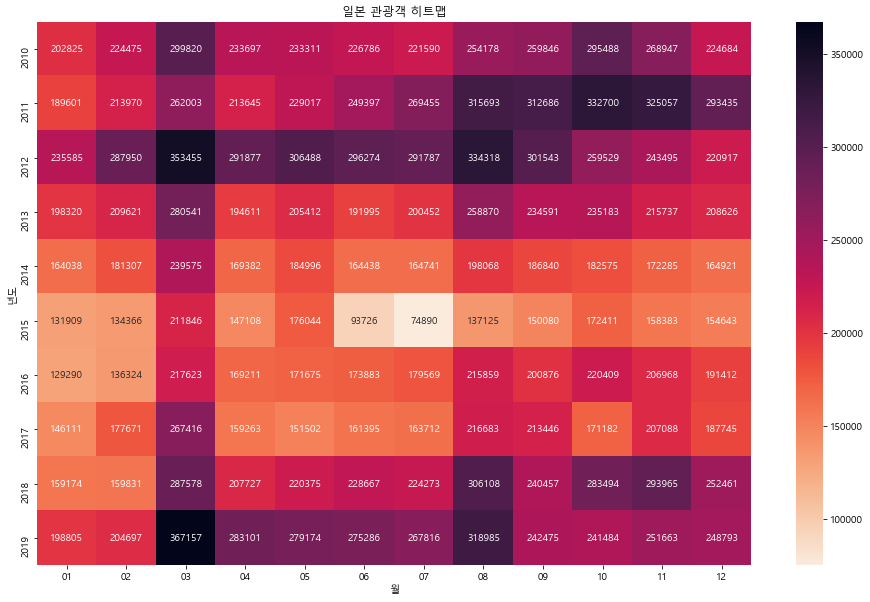

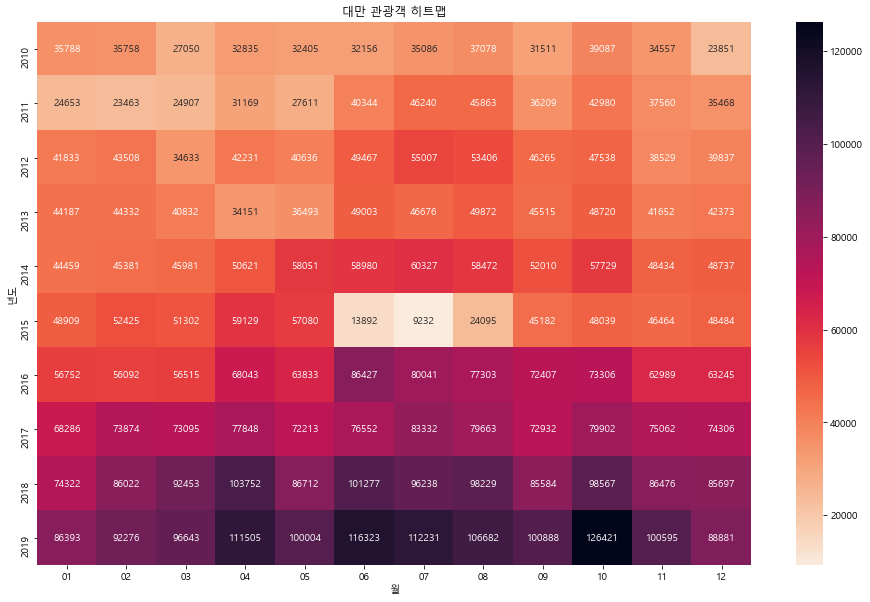

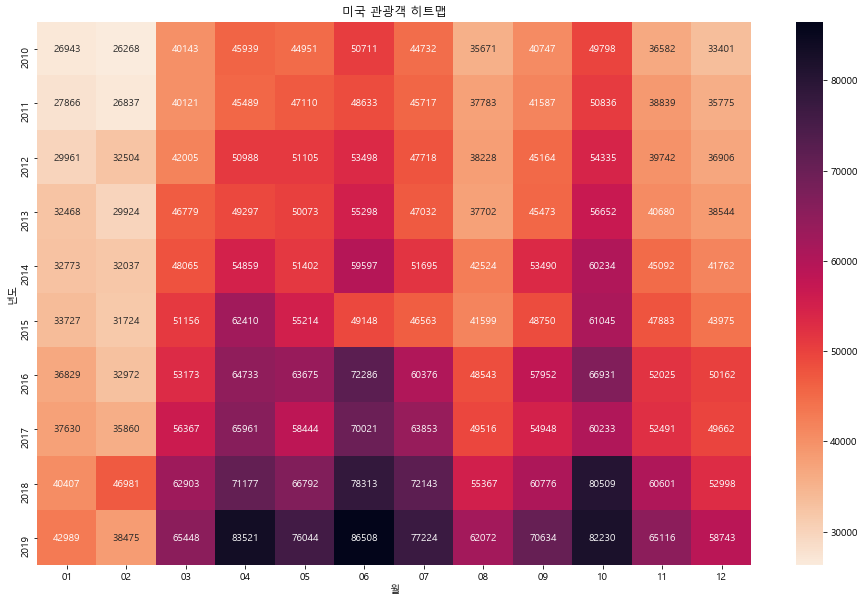

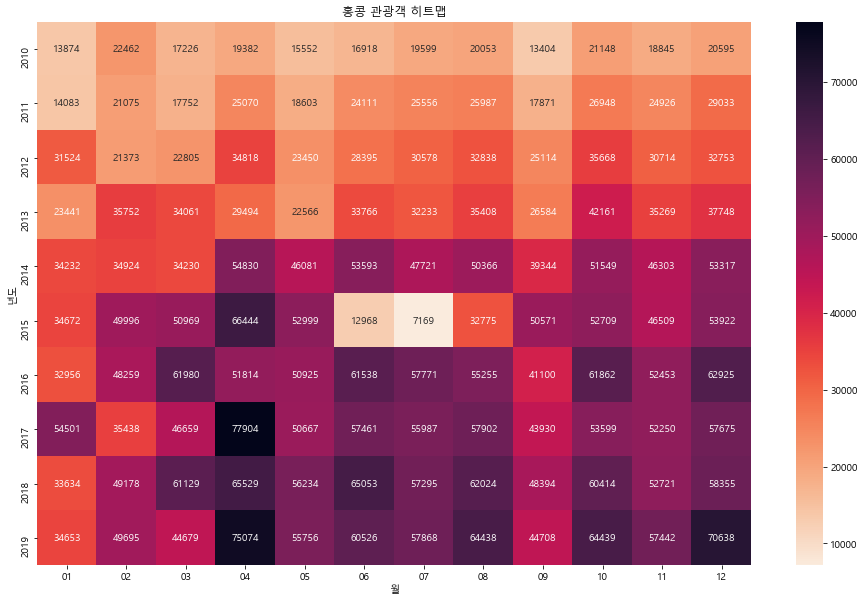

In [76]:
for cntry in cntry_list:
    condition = (df['국적']==cntry)
    df_filter = df[condition]
    
    df_pivot = df_filter.pivot_table(values = '관광',
                                    index = '년도',
                                    columns = '월')
    
    plt.figure(figsize=(16,10))
    
    sns.heatmap(df_pivot, annot=True, fmt='.0f', cmap='rocket_r')
    
    plt.title('{} 관광객 히트맵'.format(cntry))
    
    plt.show()